In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#install dependencies
import tensorflow as tf
import os
import cv2
import imghdr

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [8]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/cnn_project/data')

Found 941 files belonging to 2 classes.


In [9]:
data_iterator = data.as_numpy_iterator()

In [10]:
batch = data_iterator.next()

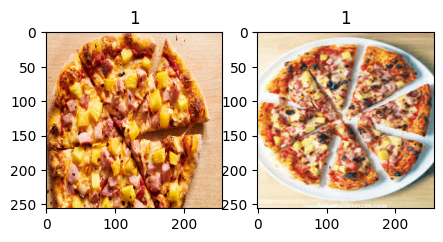

In [11]:
fig, ax = plt.subplots(ncols=2, figsize=(5,5))
for idx, img in enumerate(batch[0][:2]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [26]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/cnn_project/data', batch_size = 32).map(lambda x,y: (x/255, y))
batch = data.as_numpy_iterator().next()
#batch[0] is a list of images stored as numpy matrices
#batch[1] is a list of labels to each corresponding image

Found 941 files belonging to 2 classes.


1.0


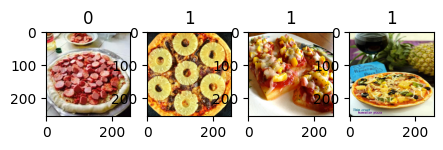

In [27]:
print(batch[0].max())
fig, ax = plt.subplots(ncols=4, figsize=(5,5))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [28]:
len(data)

30

In [29]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.2)
test_size = int(len(data)*.2)

In [39]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [31]:
#time to build the deep learning model!
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [32]:
model = Sequential()

In [33]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
logdir='logs'

In [37]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [40]:
hist = model.fit(train, epochs=50, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 981ms/step - accuracy: 0.5935 - loss: 1.3429 - val_accuracy: 0.5938 - val_loss: 0.6852
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 876ms/step - accuracy: 0.5475 - loss: 0.6957 - val_accuracy: 0.5417 - val_loss: 0.6908
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 830ms/step - accuracy: 0.5603 - loss: 0.6833 - val_accuracy: 0.5729 - val_loss: 0.6705
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 685ms/step - accuracy: 0.6208 - loss: 0.6409 - val_accuracy: 0.7031 - val_loss: 0.5482
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 690ms/step - accuracy: 0.7556 - loss: 0.5263 - val_accuracy: 0.7969 - val_loss: 0.5794
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 868ms/step - accuracy: 0.8139 - loss: 0.5065 - val_accuracy: 0.7708 - val_loss: 0.4430
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 693ms/step - accuracy: 0.8500 - loss: 0.3687 - val_accuracy: 0.8073 - val_loss: 0.4180
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 681ms/step - accuracy: 0.8880 - loss: 0.2976 - val_accu

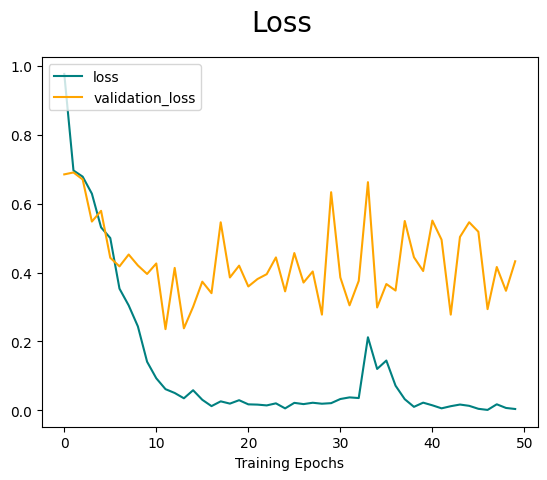

In [56]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='validation_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.xlabel('Training Epochs')

plt.show()

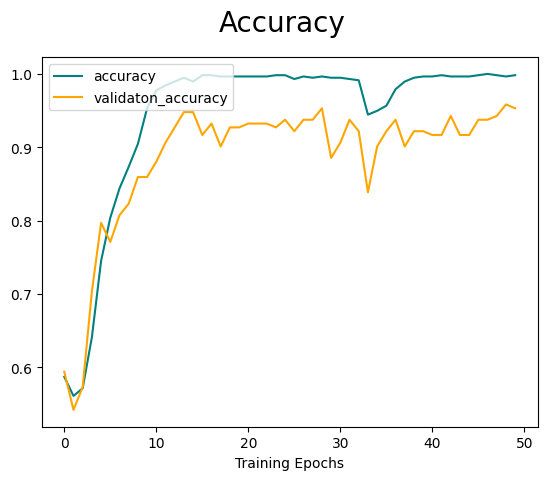

In [57]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='validaton_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.xlabel('Training Epochs')

plt.show()

In [51]:
# eval
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [52]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [53]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [55]:
print("Here are the test set scores:")
print(f"Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}")

Here are the test set scores:
Precision: 0.9054054021835327, Recall: 0.9054054021835327, Accuracy: 0.9190751314163208


**Manual Testing the Classifier**

In [65]:
import cv2

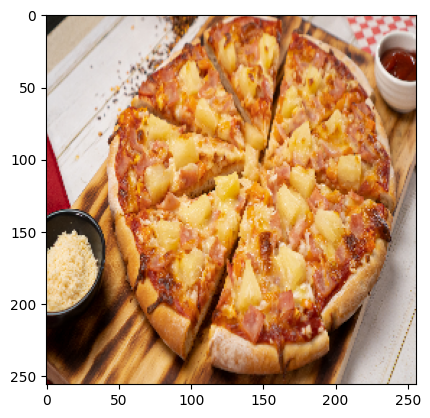

In [68]:
img = cv2.imread('pine.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [69]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step


In [70]:
if yhat > 0.5:
    print(f'Predicted class is Pineapple')
else:
    print(f'Predicted class is No_Pineapple')

Predicted class is Pineapple


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class is Pineapple


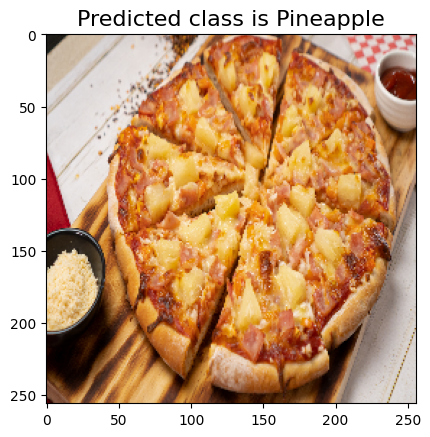

In [75]:
img = cv2.imread('pine.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
yhat = model.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print(f'Predicted class is Pineapple')
    plt.title('Predicted class is Pineapple', fontsize=16)

else:
    print(f'Predicted class is No_Pineapple')
    plt.title('Predicted class is No_Pineapple', fontsize=16)

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Predicted class is No_Pineapple


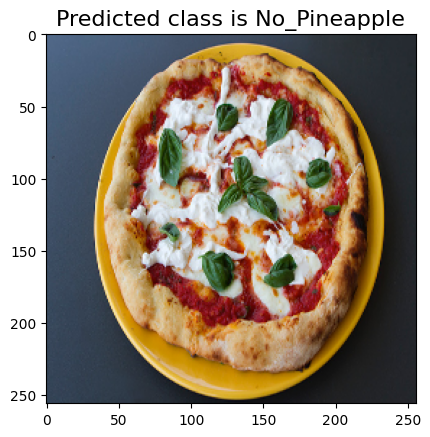

In [74]:
img = cv2.imread('italy.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
yhat = model.predict(np.expand_dims(resize/255, 0))
if yhat > 0.5:
    print(f'Predicted class is Pineapple')
    plt.title('Predicted class is Pineapple', fontsize=16)

else:
    print(f'Predicted class is No_Pineapple')
    plt.title('Predicted class is No_Pineapple', fontsize=16)

plt.show()

Saving the Model

In [62]:
from google.colab import files

In [59]:
model.save('pineapple_CNN.keras')

In [63]:
files.download('/content/pineapple_CNN.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>